# Sandbox notebook for data analysis and visualization

Author: Veikka Immonen

In [1]:
import numpy as np
import pandas as pd
import polars as pl
# import polars as pl
import matplotlib.pyplot as plt
import cv2
import scipy

from pathlib import Path
import glob
from collections import Counter
from PIL import Image
import re

from tqdm import tqdm

import scienceplots

plt.style.use('science')

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 12
})

from sklearn.model_selection import train_test_split

plt_original_resolution = plt.rcParams['figure.figsize']
plt_original_resolution

[3.5, 2.625]

## CytoSense

In [2]:
data_dir = Path('./data/FASTVISION-plus')
image_dir = data_dir / 'images'
profile_dir = data_dir / 'profiles'
annotations = pd.read_csv(data_dir / 'annotations.csv')
annotations, len(annotations)

(          ID               class_name
 0          1  Aphanizomenon_flosaquae
 1          2  Aphanizomenon_flosaquae
 2          3  Aphanizomenon_flosaquae
 3          4  Aphanizomenon_flosaquae
 4          5  Aphanizomenon_flosaquae
 ...      ...                      ...
 20045  20046           Tetraselmis_sp
 20046  20047           Tetraselmis_sp
 20047  20048           Tetraselmis_sp
 20048  20049           Tetraselmis_sp
 20049  20050           Tetraselmis_sp
 
 [20050 rows x 2 columns],
 20050)

### Statistics

Number of samples for each instance, how many of them are purely multimodal 
(images + all time series data)?

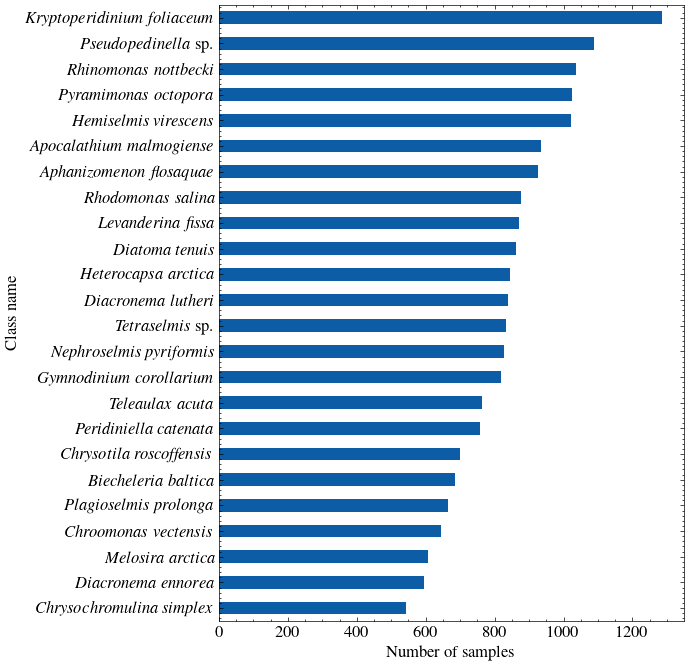

In [3]:
counter = Counter(annotations.class_name)

for key in list(counter.keys()):
    pieces = key.split('_')
    if len(pieces) == 1:
        title = f'$\it{{{key}}}$'
    elif pieces[-1] == 'sp':
        title = ('$\it{{{}}}$ ' * (len(pieces) - 1)).format(*pieces[:-1]) + 'sp.'  
    else:
        title = ('$\it{{{}}}$ ' * len(pieces)).format(*pieces)[:-1]
    counter[title] = counter[key]
    del counter[key]
    

df = pd.DataFrame(
    data=counter.values(),
    index=counter.keys(),
)

df.sort_values(0).plot(kind='barh', figsize=(6, 8), legend=False)

plt.xlabel('Number of samples')
plt.ylabel('Class name')

plt.savefig(f'figures/sample_counts.pdf')
plt.show()

Rough selection would be to exclude classes with less than 10 multimodal samples.

### Visualization

<>:27: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\i'
<>:27: SyntaxWarning: invalid escape sequence '\i'
<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_165105/384379428.py:27: SyntaxWarning: invalid escape sequence '\i'
  title = f'$\it{{{name}}}$'
/tmp/ipykernel_165105/384379428.py:29: SyntaxWarning: invalid escape sequence '\i'
  title = ('$\it{{{}}}$ ' * (len(pieces) - 1)).format(*pieces[:-1]) + 'sp.'
/tmp/ipykernel_165105/384379428.py:31: SyntaxWarning: invalid escape sequence '\i'
  title = ('$\it{{{}}}$ ' * len(pieces)).format(*pieces)[:-1]


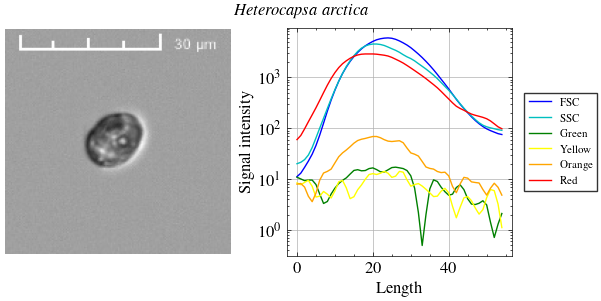

In [5]:
np.random.seed(1)


def visualize(sample):
    image = np.array(Image.open(image_dir / f"{sample.ID}.jpg"))
    profile = pd.read_csv(profile_dir / f"{sample.ID}.csv")

    styles = ['b', 'c', 'g', 'yellow', 'orange', 'r', 'k']

    fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")

    ax1.imshow(image)
    ax1.set_axis_off()

    ax2 = profile.plot(ax=ax2, style=dict(zip(profile.columns, styles)))
    ax2.legend(loc=7, frameon=True, edgecolor='k', fancybox=False, bbox_to_anchor=(1.4, 0.5), fontsize=8)
    ax2.set_xlabel('Length')
    ax2.set_ylabel('Signal intensity')
    ax2.set_yscale('log')
    # ax2.set_ylim([profile.min().min(), None])

    fig.set_size_inches(6, 3)

    name = sample.class_name
    pieces = name.split('_')
    if len(pieces) == 1:
        title = f'$\it{{{name}}}$'
    elif pieces[-1] == 'sp':
        title = ('$\it{{{}}}$ ' * (len(pieces) - 1)).format(*pieces[:-1]) + 'sp.'  
    else:
        title = ('$\it{{{}}}$ ' * len(pieces)).format(*pieces)[:-1]
    
    plt.grid()
    plt.suptitle(title, fontsize=12)
    plt.savefig(f'figures/{sample.class_name}.pdf')
    plt.show()

for _, sample in annotations[annotations.iloc[:, -2:].T.all()].sample(1).iterrows():
    visualize(sample)



<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:26: SyntaxWarning: invalid escape sequence '\i'
<>:28: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:26: SyntaxWarning: invalid escape sequence '\i'
<>:28: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_165105/2660848189.py:24: SyntaxWarning: invalid escape sequence '\i'
  title = f'$\it{{{name}}}$'
/tmp/ipykernel_165105/2660848189.py:26: SyntaxWarning: invalid escape sequence '\i'
  title = ('$\it{{{}}}$ ' * (len(pieces) - 1)).format(*pieces[:-1]) + 'sp.'
/tmp/ipykernel_165105/2660848189.py:28: SyntaxWarning: invalid escape sequence '\i'
  title = ('$\it{{{}}}$ ' * len(pieces)).format(*pieces)[:-1]


$\it{Aphanizomenon}$ $\it{flosaquae}$


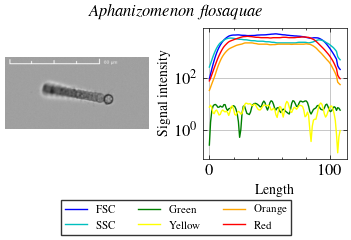

$\it{Apocalathium}$ $\it{malmogiense}$


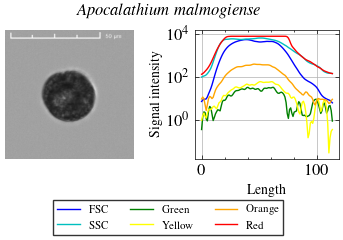

$\it{Biecheleria}$ $\it{baltica}$


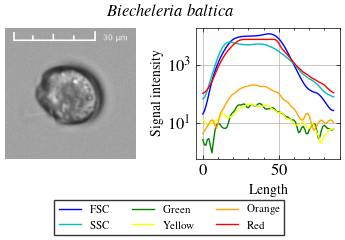

$\it{Chroomonas}$ $\it{vectensis}$


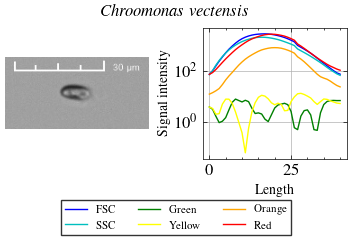

$\it{Chrysochromulina}$ $\it{simplex}$


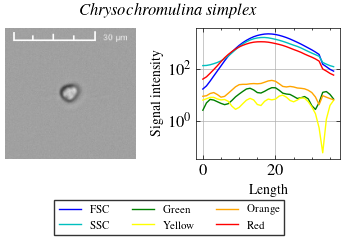

$\it{Gymnodinium}$ $\it{corollarium}$


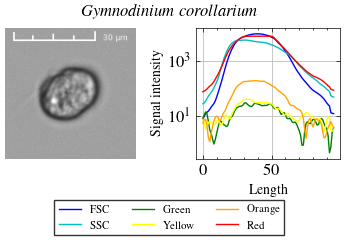

$\it{Hemiselmis}$ $\it{virescens}$


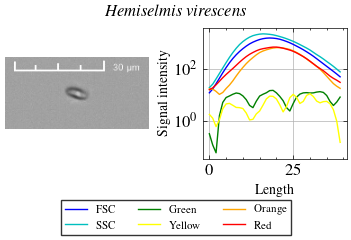

$\it{Heterocapsa}$ $\it{arctica}$


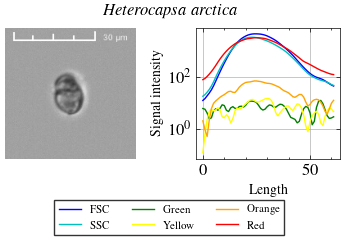

$\it{Levanderina}$ $\it{fissa}$


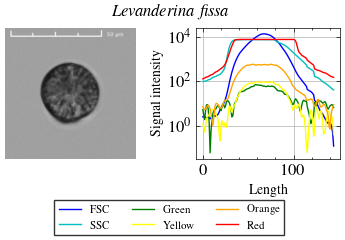

$\it{Melosira}$ $\it{arctica}$


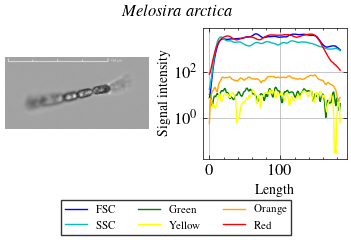

$\it{Plagioselmis}$ $\it{prolonga}$


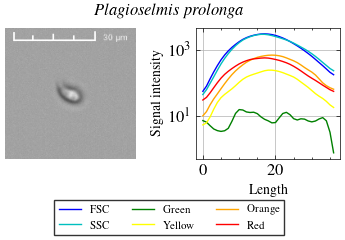

$\it{Pseudopedinella}$ sp.


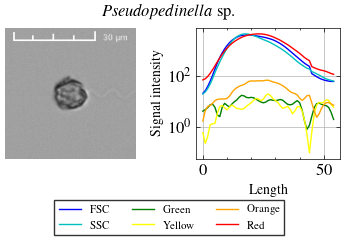

$\it{Rhinomonas}$ $\it{nottbecki}$


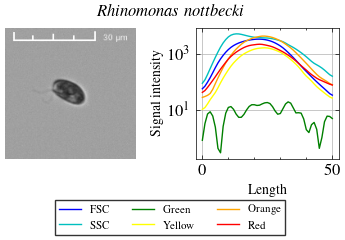

$\it{Teleaulax}$ $\it{acuta}$


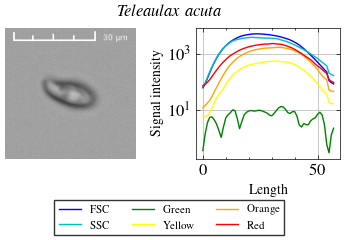

$\it{Chrysotila}$ $\it{roscoffensis}$


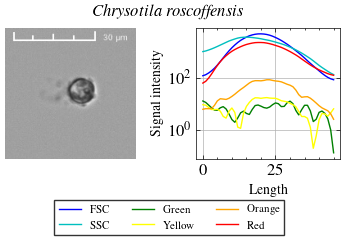

$\it{Diacronema}$ $\it{ennorea}$


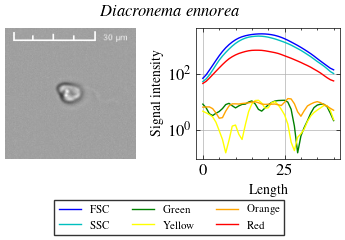

$\it{Diacronema}$ $\it{lutheri}$


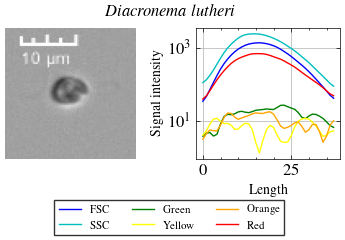

$\it{Diatoma}$ $\it{tenuis}$


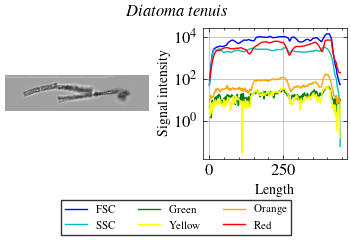

$\it{Kryptoperidinium}$ $\it{foliaceum}$


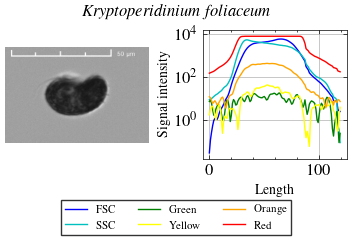

$\it{Nephroselmis}$ $\it{pyriformis}$


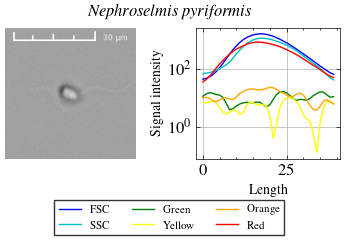

$\it{Peridiniella}$ $\it{catenata}$


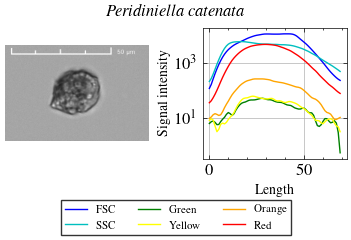

$\it{Pyramimonas}$ $\it{octopora}$


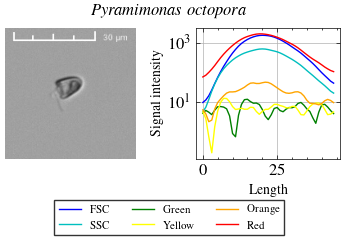

$\it{Rhodomonas}$ $\it{salina}$


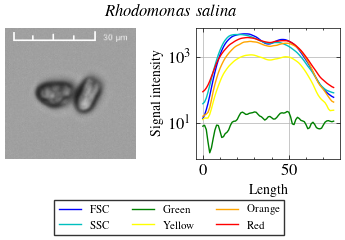

$\it{Tetraselmis}$ sp.


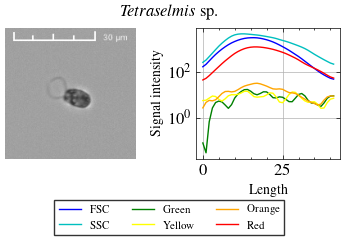

In [7]:
def visualize(sample):
    image = np.array(Image.open(image_dir / f"{sample.ID}.jpg"))
    profile = pd.read_csv(profile_dir / f"{sample.ID}.csv")

    styles = ['b', 'c', 'g', 'yellow', 'orange', 'r', 'k']

    fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")

    ax1.imshow(image)
    ax1.set_axis_off()

    ax2 = profile.plot(ax=ax2, style=dict(zip(profile.columns, styles)), legend=None)
    fig.legend(loc=8, ncols=3, frameon=True, edgecolor='k', fancybox=False, fontsize=8, bbox_to_anchor=(.5, -.2))
    ax2.set_xlabel('Length', fontsize=10)
    ax2.set_ylabel('Signal intensity', fontsize=10)
    ax2.set_yscale('log')
    # ax2.set_ylim([profile.min().min(), None])

    fig.set_size_inches(3.5, 2)
    
    name = sample.class_name
    pieces = name.split('_')
    if len(pieces) == 1:
        title = f'$\it{{{name}}}$'
    elif pieces[-1] == 'sp':
        title = ('$\it{{{}}}$ ' * (len(pieces) - 1)).format(*pieces[:-1]) + 'sp.'  
    else:
        title = ('$\it{{{}}}$ ' * len(pieces)).format(*pieces)[:-1]
    print(title)
    
    plt.grid()
    plt.suptitle(title, fontsize=12)
    plt.savefig(f'figures/small_{sample.class_name}.pdf')
    plt.show()

for name in annotations.class_name.unique():
    for _, sample in annotations[annotations.class_name == name].sample(1).iterrows():
        visualize(sample)



In [9]:
profile = pd.read_csv(profile_dir / f"{sample.X}.csv")
profile.min().min()

NameError: name 'sample' is not defined

In [11]:
multimodal = annotations[(annotations.iloc[:, -2:] == True).all(axis=1)]
class_names, counts = np.unique(multimodal.class_name, return_counts=True)

idx = counts.argsort()[::-1]
class_names = class_names[idx]
counts = counts[idx]
print(counts)

train = pd.DataFrame(columns=multimodal.columns)
test = pd.DataFrame(columns=multimodal.columns)
valid = pd.DataFrame(columns=multimodal.columns)

size=15
for i in range(size):
    annot = multimodal[multimodal.class_name == class_names[i]]
    train_annot, test_annot = train_test_split(annot, train_size=50)
    valid_annot = test_annot.sample(10)
    train = pd.concat([train, train_annot])
    test = pd.concat([test, test_annot])
    valid = pd.concat([valid, valid_annot])

train.to_csv(data_dir / f'train_{size}.csv')
test.to_csv(data_dir / f'test_{size}.csv')
valid.to_csv(data_dir / f'valid_{size}.csv')

[1659 1016  834  792  329  253  219  203  156  146  122  116  101   91
   78   66   53   49   47   43   41   32   28   19   18   17   16   14
   13   11   10    8    3    3    3    1]


In [12]:
table = pd.read_csv('./data/CytoSense/Pulse-shapes_annotated_CS_images.csv')

In [13]:
table = table.iloc[:, -7:].dropna()
max_vals = table.max(0).to_numpy().astype(int)
min_vals = table.min(0).to_numpy().astype(int)

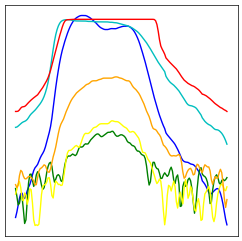

In [ ]:
    
for _, sample in annotations[annotations.iloc[:, -2:].T.all()].sample().iterrows():
    x = sample.ID

    image = Image.open(image_dir / f"{x}.jpg")
    profile = pd.read_csv(profile_dir / f"{x}.csv")
    profile = np.log(profile + 1)

    h, w = image.size

    if h == w:
        styles = ['b', 'c', 'g', 'yellow', 'orange', 'r']

        fig, ax = plt.subplots(figsize=(3, 3))
        ax = profile.plot(ax=ax, style=dict(zip(profile.columns, styles)))

        ax.legend().set_visible(False)
    
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        plt.savefig(f'figures/{x}_profile.jpg')
        image = image.resize((256, 256))
        image.save(f'figures/{x}_image.jpg')

        plt.show()


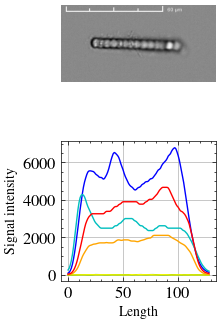

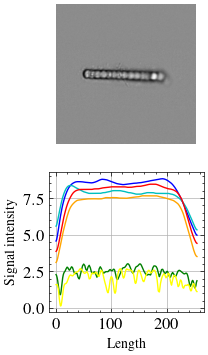

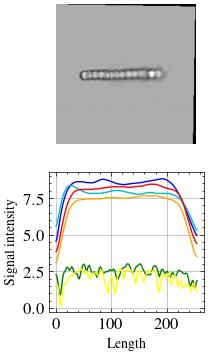

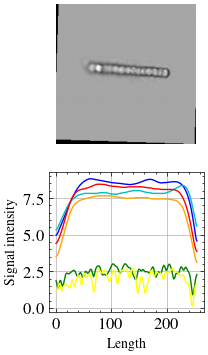

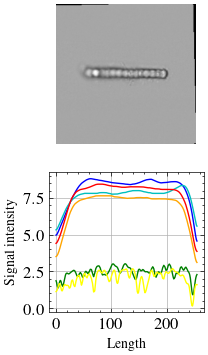

In [9]:
from src import data
import cv2
import torch

sample = annotations.iloc[243]

image = cv2.imread(image_dir / f'{sample.ID}.jpg', cv2.IMREAD_GRAYSCALE)
profile = np.loadtxt(profile_dir / f'{sample.ID}.csv', delimiter=',', skiprows=1)  
profile = torch.tensor(profile)

img_tr = data.ImageTransforms()
prf_tr = data.ProfileTransform(max_len=256)
pair_tr = data.PairAugmentation()

_, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 4))
ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
for feature, color in zip(profile.T, ['b', 'c', 'g', 'yellow', 'orange', 'r']):
    ax2.plot(feature, color=color)
ax2.set_xlabel('Length', fontsize=10)
ax2.set_ylabel('Signal intensity', fontsize=10)
plt.grid()
plt.savefig(f'figures/augment_{sample.ID}_orig.pdf')

_, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 4))
ax1.imshow(img_tr(image)[0], cmap='gray')
ax1.set_axis_off()
for feature, color in zip(prf_tr(profile).T, ['b', 'c', 'g', 'yellow', 'orange', 'r']):
    ax2.plot(feature, color=color)
ax2.set_xlabel('Length', fontsize=10)
ax2.set_ylabel('Signal intensity', fontsize=10)
plt.grid()
plt.savefig(f'figures/augment_{sample.ID}_proc.pdf')

for i in range(3):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 4))
    foo, bar = pair_tr(img_tr(image), prf_tr(profile))
    ax1.imshow(foo[0], cmap='gray')
    ax1.set_axis_off()
    for feature, color in zip(bar.T, ['b', 'c', 'g', 'yellow', 'orange', 'r']):
        ax2.plot(feature, color=color)
    ax2.set_xlabel('Length', fontsize=10)
    ax2.set_ylabel('Signal intensity', fontsize=10)
    plt.grid()
    plt.savefig(f'figures/augment_{sample.ID}_{i}.pdf')


<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_33741/3386004030.py:8: SyntaxWarning: invalid escape sequence '\P'
  ax.plot(x, gelu(x), label='GELU$(x) = x\Phi(x)$')


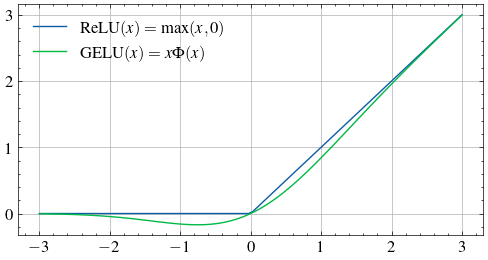

In [11]:
import torch
from torch.nn.functional import relu, gelu

fig, ax = plt.subplots(figsize=(6, 3))

x = torch.linspace(-3, 3, 100)
ax.plot(x, relu(x), label='ReLU$(x) =$ max$(x, 0)$')
ax.plot(x, gelu(x), label='GELU$(x) = x\Phi(x)$')

ax.legend()
ax.grid()
fig.savefig('figures/relugelu.pdf')

In [3]:
images = [Image.open(image_dir / f'{id}.jpg').convert('L') for id in tqdm(annotations.ID)]
profiles = [pd.read_csv(profile_dir / f'{id}.csv') for id in tqdm(annotations.ID)]



100%|██████████| 20050/20050 [00:10<00:00, 1894.50it/s]


In [4]:
size = np.array([image.size for image in images])
lengths = np.array([len(profile) for profile in profiles])


In [1]:

profiles[0].min()

NameError: name 'profiles' is not defined

In [3]:
root = Path('./data/CytoSense')
img_path = root / 'images'          # image data
mod_path = root / 'profiles'        # optical profiles
annot_path = root / 'annotations.csv'
orig_path = root / 'Annotated_CS_images'

pattern = str(orig_path / '**' / '*.jpg')
image_files = glob.glob(pattern, recursive=True)
image_samples = [file.split('/')[-1].split('_Cropped')[0] for file in image_files]
image_ids = [int(re.findall(r'\d+', file)[-1]) for file in image_files]

In [31]:
print(np.where(np.array(image_ids) == 0))

image_files[1380]

(array([ 1380,  2011,  3175,  5638,  6706,  7728,  8604, 11087, 13952]),)


'data/CytoSense/Annotated_CS_images/Pyramimonas_sp/D205_FLR_L 2020-07-09 17h54_Cropped_With_Scalebar_0.jpg'

data/CytoSense/Annotated_CS_images/Cryptophyceae-Teleaulax/Plagioselmis/D207_FLR_L 2020-07-31 17h49_Cropped_With_Scalebar_7984.jpg
data/CytoSense/Annotated_CS_images/Cryptophyceae-Teleaulax/Plagioselmis/D207_FLR_L 2020-07-31 17h49_Cropped_With_Scalebar_7984 - Copy.jpg


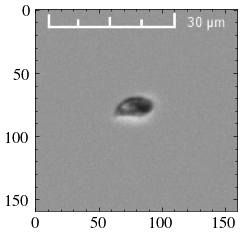

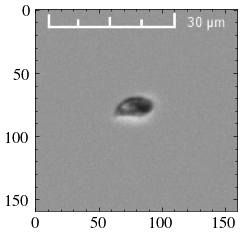

In [6]:
for foo in np.array(image_files)[np.where(np.array(['_7984' in file for file in image_files]))[0]]:
    print(foo)
    img = Image.open(foo)
    plt.figure()
    plt.imshow(img)

In [4]:
def get_frame(path):
    return (
        pl.scan_csv(path, separator=' ', truncate_ragged_lines=True,
                    schema_overrides={'FWS': pl.Float32, 'SWS': pl.Float32,
                                      'Green': pl.Float32, 'Yellow': pl.Float32, 
                                      'Orange': pl.Float32, 'Red': pl.Float32},
                    null_values=['NA'])
        # .head(10000)
        # .filter((pl.col('ID') > 0) & (pl.col('ID').is_in(image_ids)) & (pl.col('Sample').is_in(image_samples)))
        .filter(pl.col('ID') > 0)
        .group_by('ID')
        .agg([pl.col('FWS'), pl.col('SWS'), pl.col('FL.Green'), pl.col('FL.Yellow'),
              pl.col('FL.Orange'), pl.col('FL.Red'), pl.col('file').first()])
    ).collect()


df = pl.concat((
    # get_frame(root / 'PDexp_Micro_phyto_pulse-shapes.txt'),
    get_frame(root / 'Uto_2020_pulse-shapes.txt'),
))

In [39]:
'_' + pl.col('ID').cast(pl.String) + '.'

<Expr ['[([("_") + (col("ID").strict_c…'] at 0x7346FD065B10>

In [5]:
df

ID,FWS,SWS,FL.Green,FL.Yellow,FL.Orange,FL.Red,file
i64,list[f32],list[f32],list[f64],list[f64],list[f64],list[f64],str
136762,"[9.625, 16.91, … 9.208]","[5.417, 9.0, … 10.58]","[4.458, 7.0, … 16.58]","[16.67, 16.5, … 4.042]","[13.92, 12.0, … 7.333]","[1.25, 2.406, … 2.083]","""202b_smt_S 2020-07-08 01h21_Pi…"
132698,"[32.5, 42.560001, … 17.83]","[10.25, 13.69, … 16.67]","[13.92, 15.06, … 31.17]","[7.5, 10.47, … 9.083]","[7.667, 9.594, … 9.417]","[4.917, 5.875, … 0.4167]","""D205_smt_S 2020-07-09 17h37_Pi…"
23485,"[115.699997, 154.0, … 9.417]","[11.25, 14.69, … 13.58]","[0.8333, 3.438, … 5.083]","[15.92, 12.28, … 3.5]","[10.25, 10.75, … 8.75]","[17.33, 20.31, … 1.625]","""UtoF_smt_S 2020-07-09 09h24_Pi…"
54288,"[5.083, 7.594, … 32.830002]","[12.42, 16.190001, … 15.0]","[1.833, 0.6875, … 4.083]","[5.042, 6.906, … 9.417]","[5.083, 4.469, … 10.75]","[1.458, 1.969, … 1.083]","""D210_smt_S 2020-08-02 05h48_Pi…"
11805,"[4.833, 6.969, … 20.17]","[2.958, 3.969, … 18.5]","[3.292, 2.219, … 7.0]","[14.67, 16.19, … 11.75]","[5.333, 4.625, … 10.08]","[15.33, 22.31, … 3.875]","""D210_FLR_L 2020-08-02 06h01_NF…"
…,…,…,…,…,…,…,…
75239,"[17.17, 21.940001, … 22.42]","[14.67, 16.559999, … 13.58]","[14.25, 9.0, … 5.292]","[11.58, 13.94, … 10.92]","[12.25, 14.19, … 6.042]","[3.333, 4.156, … 5.292]","""UtoF_smt_S 2020-07-08 21h54_Pi…"
83215,"[12.83, 15.84, … 21.5]","[17.33, 20.309999, … 14.67]","[5.667, 9.719, … 12.92]","[0.1667, 0.9375, … 10.25]","[10.58, 10.13, … 5.708]","[3.625, 4.0, … 0.3333]","""UtoF_smt_S 2020-07-09 12h24_Pi…"
79014,"[21.25, 28.379999, … 3.875]","[15.0, 17.559999, … 11.42]","[15.08, 14.63, … 11.08]","[14.75, 11.72, … 3.75]","[1.833, 5.563, … 7.75]","[2.75, 3.313, … 0.0]","""UtoF_smt_S 2020-07-08 15h54_Pi…"


(array([16]),)


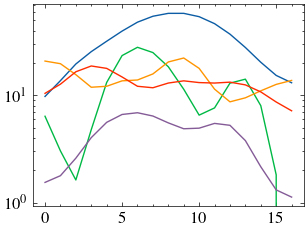

In [36]:
data = np.stack(list(df[10000, 2:7].to_numpy()[0])).T
print(np.where((data == 0).any(1)))
plt.plot(data)
plt.yscale('log')

In [16]:
ids = table.ID
list(table.groupby('ID'))

: 

In [ ]:
table.ID !=

1             192
2             192
3             192
4             192
5             192
            ...  
38854511    10839
38854512    10839
38854513    10839
38854514        0
38854515        0
Name: ID, Length: 38854515, dtype: int64

In [9]:
dirs = filter(Path.is_dir, data_dir.iterdir())
files = []
for directory in dirs: 
    files.extend(directory.glob('*.jpg'))

len(files)
files

[PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-15 12h16_Cropped_With_Scalebar_985.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-14 00h16_Cropped_With_Scalebar_465.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-14 15h16_Cropped_With_Scalebar_1055.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-14 03h16_Cropped_With_Scalebar_768.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-09 02h10_Cropped_With_Scalebar_1584.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-14 12h16_Cropped_With_Scalebar_150.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-15 03h16_Cropped_With_Scalebar_130.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-14 13h16_Cropped_With_Scalebar_613.jpg'),
 PosixPath('data/CytoSense/Ceratoconeis closterion/UtoF_FLR_L 2020-07-13 09h16_Cropped_With_Scalebar_6

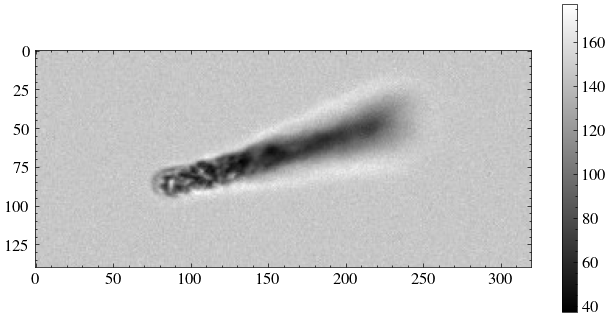

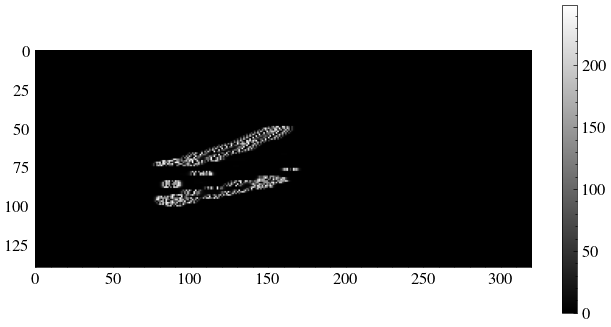

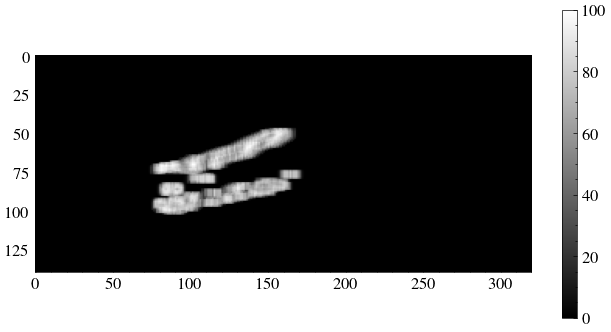

In [52]:
import scipy.ndimage


file_name = 'data/CytoSense/Annotated_CS_images/Aphanizomenon_flosaquae/UtoF_FLR_L 2020-07-09 13h10_Cropped_With_Scalebar_461.jpg'

img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
img = img[20:]

plt.figure(figsize=(8, 4))
plt.imshow(img, cmap='gray')
plt.colorbar()

laplacian = scipy.ndimage.gaussian_laplace(img, 3)**2
# laplacian = (laplacian - laplacian.min()) / (laplacian.max() - laplacian.min())


plt.figure(figsize=(8, 4))
plt.imshow(laplacian, cmap='gray')
plt.colorbar()

def filt(window):
    return window.std()

stds = scipy.ndimage.generic_filter(laplacian, filt, 5)

plt.figure(figsize=(8, 4))
plt.imshow(stds, cmap='gray')
plt.colorbar()